# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [10]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

In [11]:
# your code(s)
data=pd.read_csv('/content/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000




  
*   Can you use a simple linear regression model to fit this data (Yes/No)?
  
        we cannot because they do not show a linear relationship so fitting a linear model will not yeild needed result(under fitting will occur)

* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * Yes



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= \frac{1}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right)^2$$

Predicted Salary for level 7.5: $328672.35


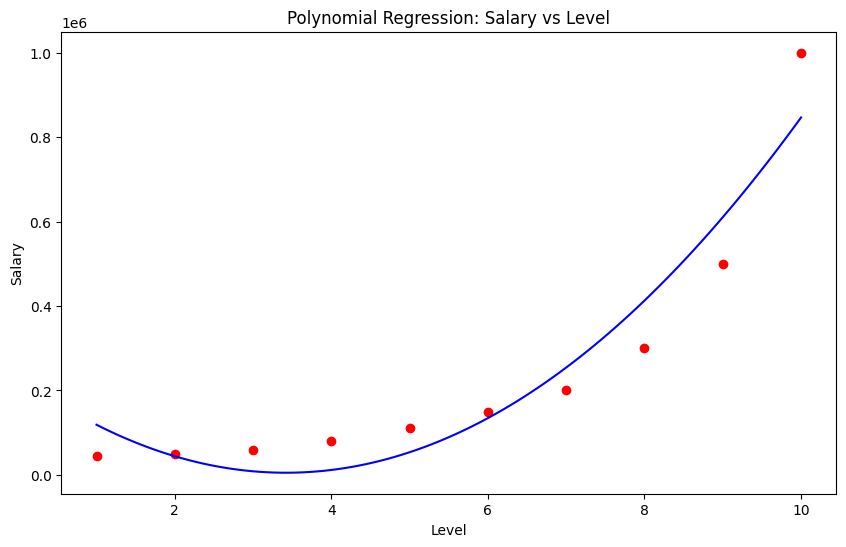

In [12]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values
X_poly = np.hstack((X, X**2))
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

def poly_model(x):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x**2

level_new = 7.5
predicted_salary = poly_model(level_new)
print(f"Predicted Salary for level {level_new}: ${predicted_salary:.2f}")

# Plotting the polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red')
plt.plot(np.linspace(min(X), max(X), 100), poly_model(np.linspace(min(X), max(X), 100)), color='blue')
plt.title('Polynomial Regression: Salary vs Level')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes
* Explain why you said yes or no to the above questions.
> * > The goal of linear regression is to minimize the difference between the predicted values and the actual values of the dependent variable. MSE is a commonly used measure of the average squared difference between the predicted values and the actual values. By minimizing the MSE, you are effectively minimizing the overall error between the predicted and actual values, making it a suitable cost function for linear regression.

**Derivatives of cost function:**
* Derivative with respect to (w_1) , weight of x^2
$$
  \frac{\partial MSE}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}^2
  $$
* Derivative with respect to (w_2), weight of x
$$
  \frac{\partial MSE}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right) x_{1i}
  $$
* Derivative with respect to b, bias
 $$
  \frac{\partial MSE}{\partial b} = -\frac{2}{n} \sum_{i=1}^n \left(y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b)\right)
  $$

**Gradient Descent Algorithm:**
```
Repeat until converges:
```
$$ Δw_1 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}^2 \
       $$ $$Δw_2 = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right) x_{1i}$$
       $$ Δb = -\frac{2}{n} \sum_{i=1}^n \left( y_i - (w_1 x_{1i}^2 + w_2 x_{1i} + b) \right)$$

## Implementation of the model

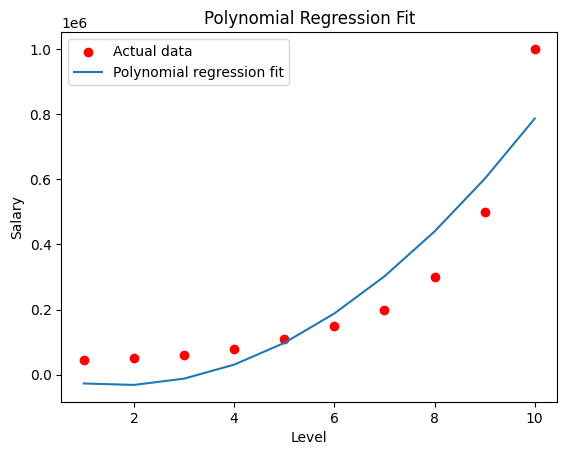

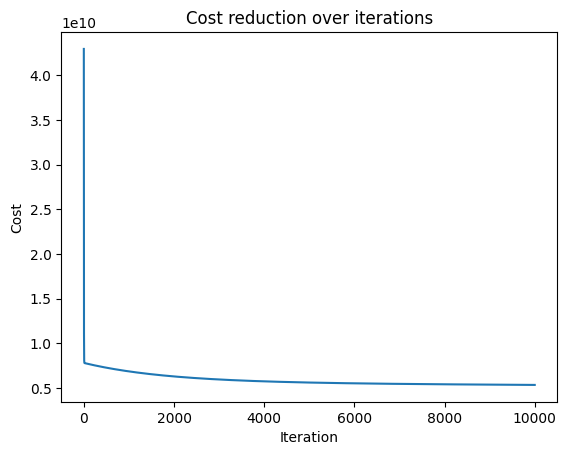

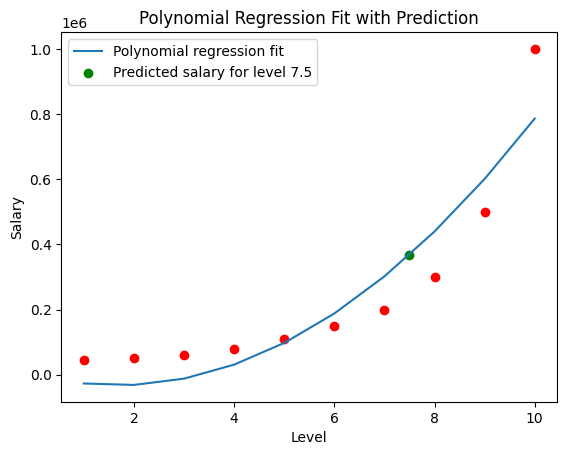

Predicted Salary for level 7.5: $367,915.23


In [9]:
# Polynomial Regression Model Function
def polynomial_regression(x, coefficients):
    """ Calculates y_pred = b + w1*x + w2*x^2 """
    y_pred = np.dot(x, coefficients)
    return y_pred

# Cost Function - Mean Squared Error
def compute_cost(X, y, coefficients):
    """ Computes the mean squared error cost """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    cost = (1/(2*n)) * np.sum((y_pred - y) ** 2)
    return cost

# Derivative of Cost Function
def derivatives(X, y, coefficients):
    """ Computes the derivatives of the MSE cost function """
    n = len(y)
    y_pred = polynomial_regression(X, coefficients)
    d_coefficients = (1/n) * np.dot(X.T, (y_pred - y))
    return d_coefficients

# Gradient Descent Function to Minimize the Cost Function
def gradient_descent(X, y, coefficients, learning_rate, iterations):
    """ Performs gradient descent to learn coefficients """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        coefficients -= learning_rate * derivatives(X, y, coefficients)
        cost_history[i] = compute_cost(X, y, coefficients)
    return coefficients, cost_history

# Load the dataset
data=pd.read_csv(r"Position_Salaries.csv")
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

# Prepare polynomial features: x, x^2
X_poly = np.hstack((np.ones((X.shape[0], 1)), X, X**2))
# Initial coefficients (b, w1, w2)
coefficients = np.zeros(3)
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
coefficients, cost_history = gradient_descent(X_poly, y, coefficients, learning_rate, iterations)

# Predicting using optimized coefficients
y_pred = polynomial_regression(X_poly, coefficients)
# Plot polynomial model
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

# Plot iteration vs cost
plt.plot(range(iterations), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost reduction over iterations')
plt.show()
# New level prediction
level_new = 7.5
new_X = np.array([1, level_new, level_new**2]).reshape(1, -1)
predicted_salary = polynomial_regression(new_X, coefficients)

# Plot with the new prediction
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, label='Polynomial regression fit')
plt.scatter([level_new], [predicted_salary], color='green', label=f'Predicted salary for level {level_new}')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Polynomial Regression Fit with Prediction')
plt.legend()
plt.show()

print(f"Predicted Salary for level {level_new}: ${predicted_salary[0]:,.2f}")

### Answer the following

* What is learning rate?
> * The learning rate is like a step size. It decides how big a step we take when trying to find the best values for our model. If the step is too small, it can take a long time to reach the best values. If it's too big, we might miss the best values or even go in the wrong direction. So, it's important to choose the right learning rate for faster and more accurate learning.
* What will happen if the learning rate is too large?
> * If the learning rate is too large, the model might skip over the best solution and keep bouncing around without getting better. This can make the training process unstable and the model might not work well even if it seems to do well on the training data.
* What will happen if the learning rate is too small?
> * If the learning rate is too small, the model will take tiny steps towards the best solution, making the training process very slow.
If you what to change the second order (quadratic) model to third
* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?

      Modify the polynomial_regression function to include the cubic term in the equation for y_pred.

      Update the derivatives function to account for the derivatives of the cost function with respect to the new cubic term coefficient.

      Initialize the coefficients with 4 zeros instead of 3 (to include the coefficient for the cubic term).

      Update the X_poly calculation to include the cubic term X**3.

      In the prediction step for a new level, update the new_X array to include the cubic term for the new level.